[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/Principal_Component_Analysis.ipynb)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


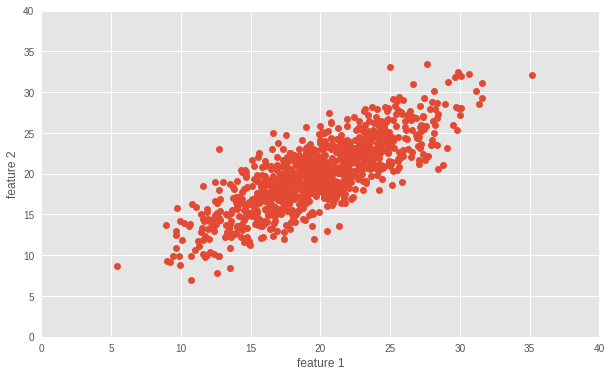

In [1]:
import numpy as np
mean = [20, 20]
cov = [[5, 0], [25, 25]]
np.random.seed(42)
x, y = np.random.multivariate_normal(mean, cov, 1000).T
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

In [2]:
X = np.vstack((x, y)).T
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71481632,  0.69931225],
       [-0.69931225,  0.71481632]])

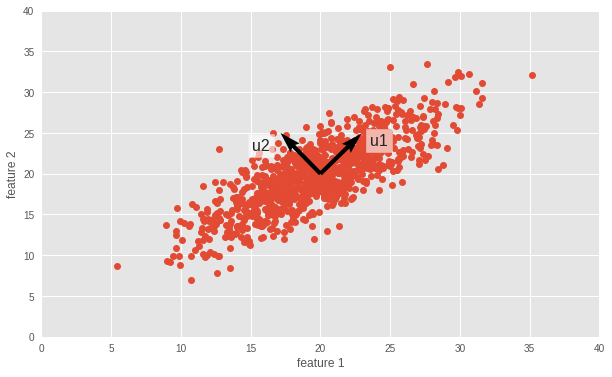

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

[-20, 20, -10, 10]

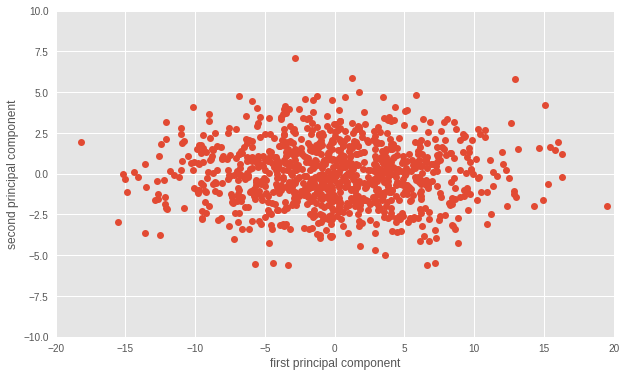

In [4]:
X2 = cv2.PCAProject(X, mu, eig)
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


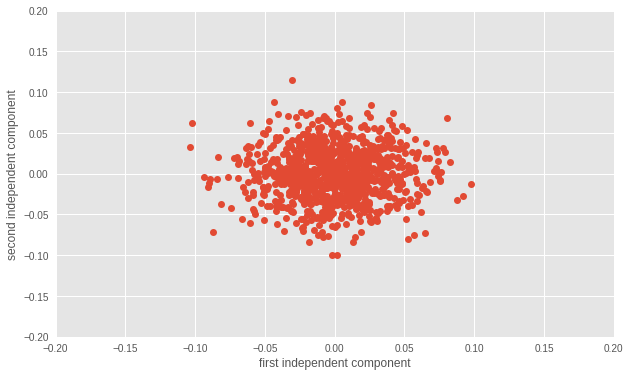

In [5]:
from sklearn import decomposition
ica = decomposition.FastICA()

X2 = ica.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])
plt.savefig('ica.png')

[0, 7, 0, 15]

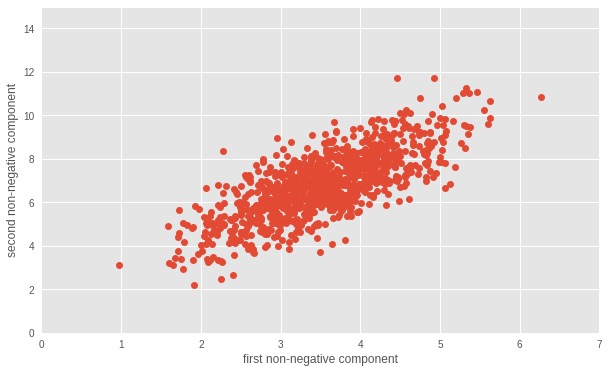

In [6]:
nmf = decomposition.NMF()
X2 = nmf.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([0, 7, -0, 15])

In [7]:
data = [
    {'name': 'Alan Turing', 'born': 1912, 'died': 1954},
    {'name': 'Herbert A. Simon', 'born': 1916, 'died': 2001},
    {'name': 'Jacek Karpinski', 'born': 1927, 'died': 2010},
    {'name': 'J.C.R. Licklider', 'born': 1915, 'died': 1990},
    {'name': 'Marvin Minsky', 'born': 1927, 'died': 2016},
]
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[1912, 1954,    1,    0,    0,    0,    0],
       [1916, 2001,    0,    1,    0,    0,    0],
       [1927, 2010,    0,    0,    0,    1,    0],
       [1915, 1990,    0,    0,    1,    0,    0],
       [1927, 2016,    0,    0,    0,    0,    1]], dtype=int64)

In [9]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<5x7 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [10]:
vec.get_feature_names()

['born',
 'died',
 'name=Alan Turing',
 'name=Herbert A. Simon',
 'name=J.C.R. Licklider',
 'name=Jacek Karpinski',
 'name=Marvin Minsky']